In [5]:
import os
import cv2
import numpy as np 
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt

from PIL import Image
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [83]:
data_dir = r"C:\Users\pwang\Desktop\cis325\TrafficData"
train_data = pd.read_csv(data_dir + r"\Train.csv")

train_data.head(5)

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [7]:
test_data = pd.read_csv(r"C:\Users\pwang\Desktop\CIS325\TrafficData\Test.csv")
test_data.head(5)

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


Number of categories: 43


<AxesSubplot:>

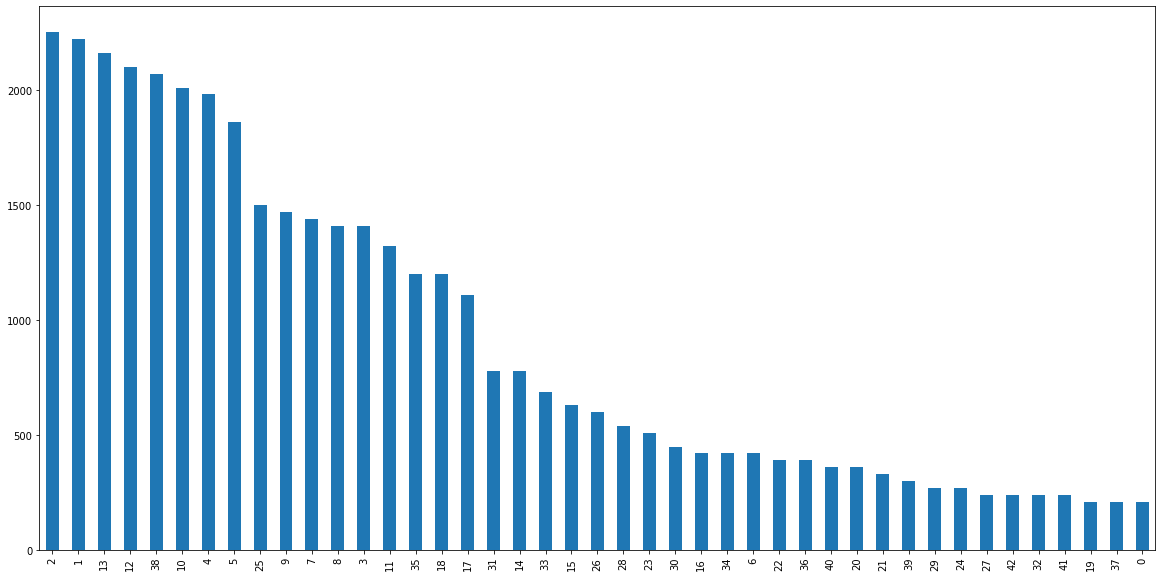

In [8]:
categories = train_data["ClassId"].nunique()
print("Number of categories:", categories)

plt.figure(figsize=(20,10))
train_data["ClassId"].value_counts(sort=True).plot.bar()

In [71]:
#reading img data, resizing to universal 30x30 size, adding to numpy arrays
data = []
labels_id = []
train_img_path = r'C:\Users\pwang\Desktop\CIS325\TrafficData\Train'

for i in range(43):
    labels = train_img_path+ '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = Image.open(labels + '/' + x)
        img = img.resize((50,50))
        img = np.array(img)
        data.append(img)
        labels_id.append(i)

data = np.array(data)
label_id = np.array(labels_id)
#normalize images
data = data/255
print(data.shape, label_id.shape)

(39209, 50, 50, 3) (39209,)


In [73]:
#Split into train test split
x_train, x_val, y_train, y_val = train_test_split(data, label_id, test_size=0.2, random_state=42)

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#first layer
classifier = Sequential()
classifier.add(Conv2D(filters = 64, kernel_size = (3, 3), input_shape = (50, 50, 3), activation = 'relu', padding = 'same'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

#second layer
classifier.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
               
classifier.add(Flatten())
               
#Dense Layer
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 43, activation = 'softmax'))


In [75]:
classifier.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [76]:
classifier.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 50, 50, 64)        1792      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 23, 23, 64)        36928     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 11, 11, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 7744)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               991360    
_________________________________________________________________
dense_15 (Dense)             (None, 43)               

In [77]:
classifier.fit( 
    x_train, y_train,
    epochs = 10,
    batch_size = 64,
    validation_data = (x_val, y_val),
)

Epoch 1/10
491/491 [==============================] - 45s 91ms/step - loss: 0.9661 - accuracy: 0.7396 - val_loss: 0.2325 - val_accuracy: 0.9382
Epoch 2/10
491/491 [==============================] - 45s 91ms/step - loss: 0.1452 - accuracy: 0.9619 - val_loss: 0.1206 - val_accuracy: 0.9745
Epoch 3/10
491/491 [==============================] - 45s 92ms/step - loss: 0.0736 - accuracy: 0.9803 - val_loss: 0.1174 - val_accuracy: 0.9697
Epoch 4/10
491/491 [==============================] - 46s 94ms/step - loss: 0.0493 - accuracy: 0.9866 - val_loss: 0.1342 - val_accuracy: 0.9665
Epoch 5/10
491/491 [==============================] - 46s 93ms/step - loss: 0.0384 - accuracy: 0.9904 - val_loss: 0.0731 - val_accuracy: 0.9820
Epoch 6/10
491/491 [==============================] - 46s 94ms/step - loss: 0.0240 - accuracy: 0.9934 - val_loss: 0.0754 - val_accuracy: 0.9818
Epoch 7/10
491/491 [==============================] - 46s 93ms/step - loss: 0.0254 - accuracy: 0.9924 - val_loss: 0.1005 - val_accuracy:

In [84]:
test_df = pd.read_csv(data_dir + r'\Test.csv')
test_df.head(5)

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [85]:
test_labels = test_df["ClassId"]
test_images = test_df["Path"].values

In [88]:
data_test = []

for q in test_images:
    image = Image.open(data_dir + '/' + q)
    image = image.resize((50,50))
    image = np.array(image)
    data_test.append(image)

In [89]:
predict = np.array(data_test)
predict = predict/255

In [90]:
y_pred = classifier.predict_classes(predict)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [91]:
print("Accuracy score:", accuracy_score(test_labels, y_pred))

Accuracy score: 0.932541567695962
